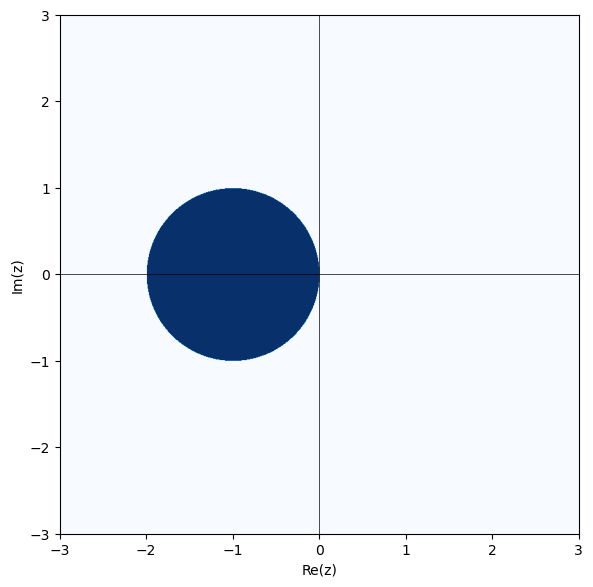

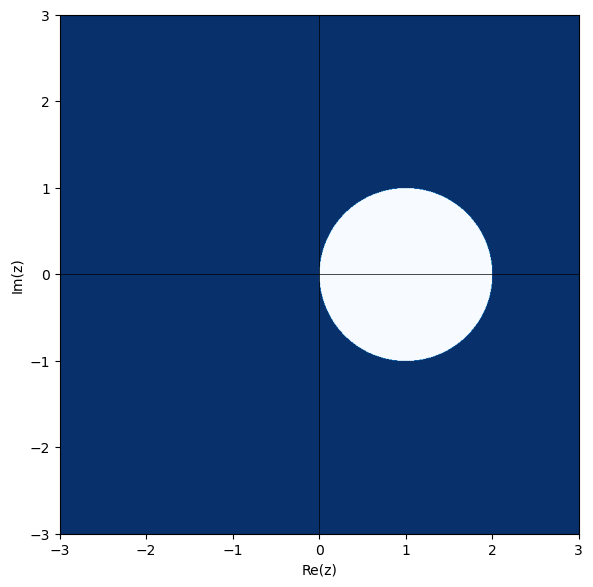

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 800)
y = np.linspace(-3, 3, 800)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

R_exp = np.abs(1 + Z)
stable_exp = (R_exp <= 1).astype(int)

plt.figure(figsize=(6, 6))
plt.imshow(
    stable_exp,
    extent=[x.min(), x.max(), y.min(), y.max()],
    origin="lower",
    cmap="Blues"
)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.tight_layout()
plt.show()


epsilon = 1e-12  
R_imp = np.abs(1 / (1 - Z + epsilon))
stable_imp = (R_imp <= 1).astype(int)

plt.figure(figsize=(6, 6))
plt.imshow(
    stable_imp,
    extent=[x.min(), x.max(), y.min(), y.max()],
    origin="lower",
    cmap="Blues"
)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.tight_layout()
plt.show()


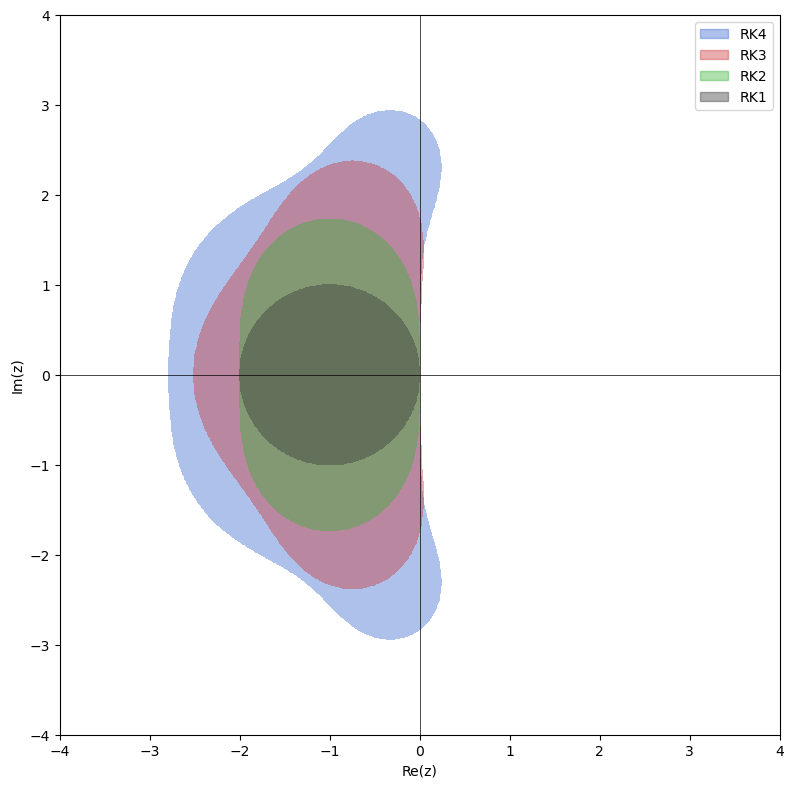

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

R1 = 1 + Z                                   
R2 = 1 + Z + Z**2 / 2                        
R3 = 1 + Z + Z**2 / 2 + Z**3 / 6             
R4 = 1 + Z + Z**2 / 2 + Z**3 / 6 + Z**4 / 24 

S1 = np.abs(R1) <= 1      
S2 = np.abs(R2) <= 1
S3 = np.abs(R3) <= 1
S4 = np.abs(R4) <= 1


fig, ax = plt.subplots(figsize=(8, 8))

for mask, color, label in [
    (S4, (0.20, 0.40, 0.80, 0.40), "RK4"),
    (S3, (0.80, 0.20, 0.20, 0.40), "RK3"),
    (S2, (0.20, 0.70, 0.20, 0.40), "RK2"),
    (S1, (0.20, 0.20, 0.20, 0.40), "RK1")]:
    ax.contourf(X, Y, mask, levels=[0.5, 1], colors=[color])


ax.axhline(0, color="black", linewidth=0.5)
ax.axvline(0, color="black", linewidth=0.5)
ax.set_xlabel("Re(z)")
ax.set_ylabel("Im(z)")

legend_patches = [
    mpatches.Patch(color=(0.20, 0.40, 0.80, 0.40), label="RK4"),
    mpatches.Patch(color=(0.80, 0.20, 0.20, 0.40), label="RK3"),
    mpatches.Patch(color=(0.20, 0.70, 0.20, 0.40), label="RK2"),
    mpatches.Patch(color=(0.20, 0.20, 0.20, 0.40), label="RK1"),
]
ax.legend(handles=legend_patches, loc="upper right")
ax.set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()


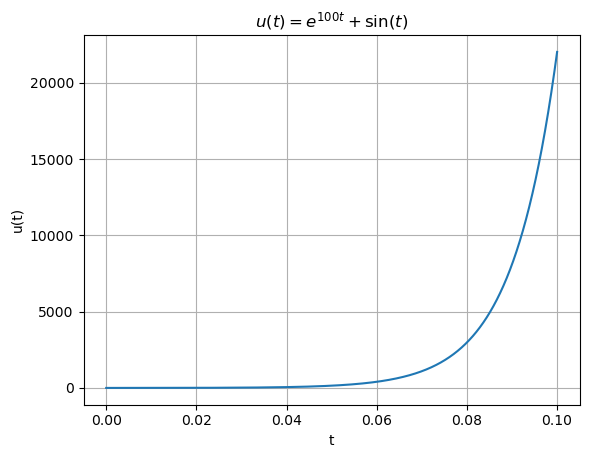

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 0.1, 10000)


y = np.exp(100 * t) + np.sin(t)


plt.plot(t, y)
plt.title(r'$u(t) = e^{100t} + \sin(t)$')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.grid(True)
plt.show()


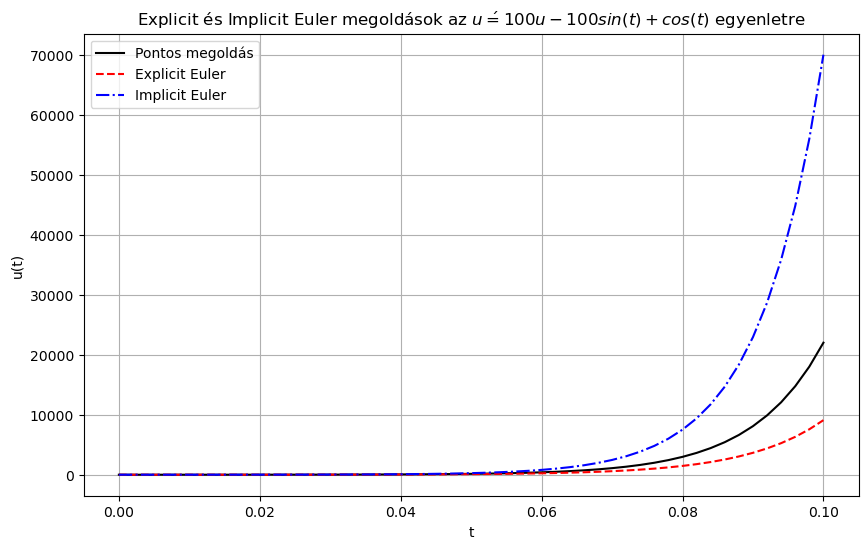

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Időparaméterek
t0, tf = 0, 0.1
N = 50
h = (tf - t0) / N
t = np.linspace(t0, tf, N+1)

# Függvények
def g(t):
    return -100 * np.sin(t) + np.cos(t)

def y_exact(t):
    return np.exp(100 * t) + np.sin(t)

# Kezdőérték
y0 = y_exact(t0)

# Explicit Euler
y_exp = np.zeros(N+1)
y_exp[0] = y0
for n in range(N):
    y_exp[n+1] = y_exp[n] + h * (100 * y_exp[n] + g(t[n]))

# Implicit Euler
y_imp = np.zeros(N+1)
y_imp[0] = y0
for n in range(N):
    y_imp[n+1] = (y_imp[n] + h * g(t[n+1])) / (1 - 100 * h)

# Pontos megoldás
y_ex = y_exact(t)

# Ábrázolás
plt.figure(figsize=(10,6))
plt.plot(t, y_ex, 'k-', label='Pontos megoldás')
plt.plot(t, y_exp, 'r--', label='Explicit Euler')
plt.plot(t, y_imp, 'b-.', label='Implicit Euler')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title(r'Explicit és Implicit Euler megoldások az $u\'=100 u - 100 sin (t) + cos(t)$ egyenletre')
plt.legend()
plt.grid(True)
plt.show()


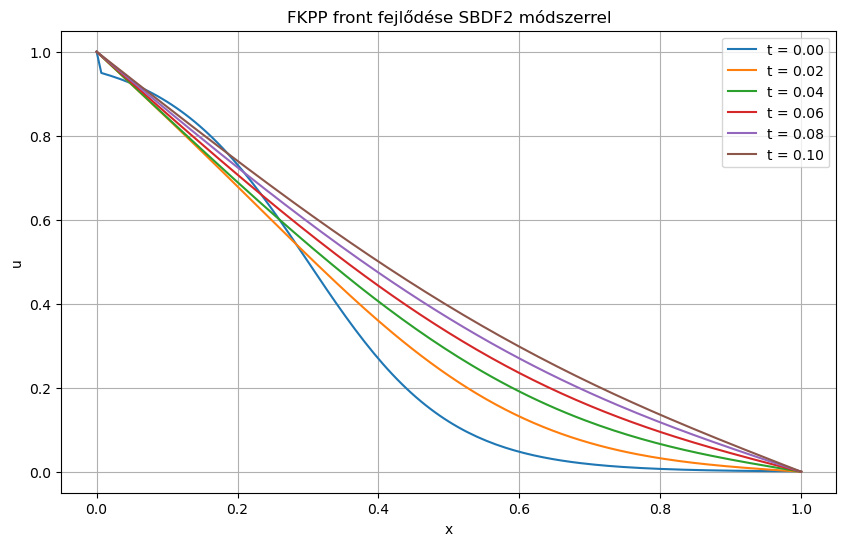

In [4]:
# Újrafuttatjuk a szimulációt, de több időpillanatban mentjük a profilt

# Paraméterek újra
D = 1.0
r = 1.0
a, b = 0.0, 1.0
N = 151
dx = (b - a) / (N - 1)
x = np.linspace(a, b, N)

# Kezdeti feltétel
beta = 10.0
x0 = 0.3
u = 1.0 / (1.0 + np.exp(beta * (x - x0)))
u[0] = 1.0
u[-1] = 0.0

m = N - 2
u_int = u[1:-1].copy()

# Laplace-operátor és peremfeltétel
diag = -2.0 * np.ones(m)
off = 1.0 * np.ones(m - 1)
L = (1.0 / dx**2) * (np.diag(diag) + np.diag(off, 1) + np.diag(off, -1))
bc_vec = np.zeros(m)
bc_vec[0] = 1.0 / dx**2 * u[0]
bc_vec[-1] = 1.0 / dx**2 * u[-1]

def f(v):
    return r * v * (1.0 - v)

# Időparaméterek
T_final = 0.1
dt = 0.001
nsteps = int(T_final / dt)
save_times = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1]
save_indices = [int(t / dt) for t in save_times]
saved_profiles = []

# SBDF1 első lépés
I = np.eye(m)
M1 = I - dt * D * L
RHS1 = u_int + dt * (f(u_int) + D * bc_vec)
u_prev = u_int.copy()
u_curr = np.linalg.solve(M1, RHS1)

if 0 in save_indices:
    profile = np.zeros_like(x)
    profile[0], profile[-1] = 1.0, 0.0
    profile[1:-1] = u_prev
    saved_profiles.append(profile)

if 1 in save_indices:
    profile = np.zeros_like(x)
    profile[0], profile[-1] = 1.0, 0.0
    profile[1:-1] = u_curr
    saved_profiles.append(profile)

# SBDF2 előkészítés
M2 = (3.0 / (2.0 * dt)) * I - D * L
M2_inv = np.linalg.inv(M2)

# SBDF2 ciklus
for n in range(2, nsteps + 1):
    rhs = (4.0 * u_curr - u_prev) / (2.0 * dt) + 2.0 * f(u_curr) - f(u_prev) + D * bc_vec
    u_next = M2_inv @ rhs
    if n in save_indices:
        profile = np.zeros_like(x)
        profile[0], profile[-1] = 1.0, 0.0
        profile[1:-1] = u_next
        saved_profiles.append(profile)
    u_prev, u_curr = u_curr, u_next

# Megjelenítés
plt.figure(figsize=(10, 6))
for i, t in enumerate(save_times):
    plt.plot(x, saved_profiles[i], label=f't = {t:.2f}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('FKPP front fejlődése SBDF2 módszerrel')
plt.legend()
plt.grid(True)
plt.show()


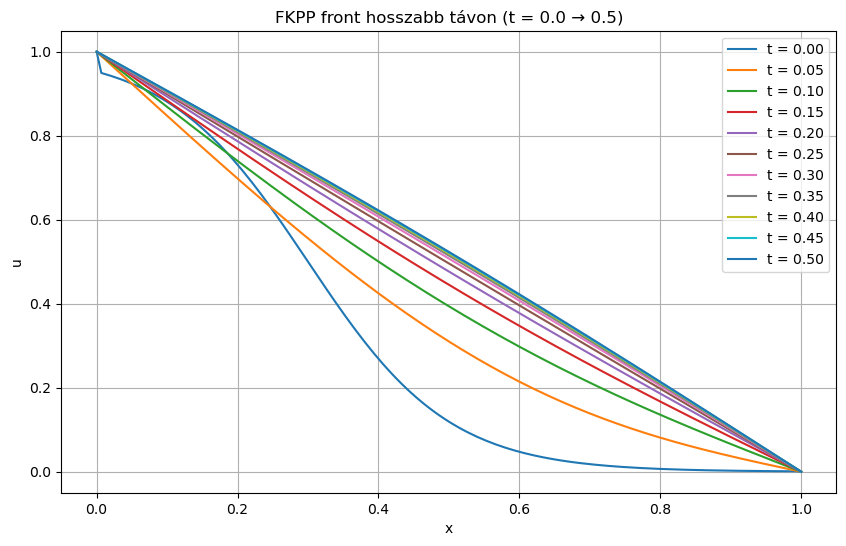

In [5]:
# Új időtartam: hosszabb szimuláció a front kifejlődésének megfigyelésére

# Időparaméterek módosítása
T_final_long = 0.5  # hosszabb szimuláció
dt = 0.001
nsteps_long = int(T_final_long / dt)
save_times_long = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
save_indices_long = [int(t / dt) for t in save_times_long]
saved_profiles_long = []

# Kezdeti feltétel újra
u = 1.0 / (1.0 + np.exp(beta * (x - x0)))
u[0] = 1.0
u[-1] = 0.0
u_int = u[1:-1].copy()

# SBDF1 első lépés
RHS1 = u_int + dt * (f(u_int) + D * bc_vec)
u_prev = u_int.copy()
u_curr = np.linalg.solve(M1, RHS1)

if 0 in save_indices_long:
    profile = np.zeros_like(x)
    profile[0], profile[-1] = 1.0, 0.0
    profile[1:-1] = u_prev
    saved_profiles_long.append(profile)

if 1 in save_indices_long:
    profile = np.zeros_like(x)
    profile[0], profile[-1] = 1.0, 0.0
    profile[1:-1] = u_curr
    saved_profiles_long.append(profile)

# SBDF2 hosszú ciklus
for n in range(2, nsteps_long + 1):
    rhs = (4.0 * u_curr - u_prev) / (2.0 * dt) + 2.0 * f(u_curr) - f(u_prev) + D * bc_vec
    u_next = M2_inv @ rhs
    if n in save_indices_long:
        profile = np.zeros_like(x)
        profile[0], profile[-1] = 1.0, 0.0
        profile[1:-1] = u_next
        saved_profiles_long.append(profile)
    u_prev, u_curr = u_curr, u_next

# Ábrázolás
plt.figure(figsize=(10, 6))
for i, t in enumerate(save_times_long):
    plt.plot(x, saved_profiles_long[i], label=f't = {t:.2f}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('FKPP front hosszabb távon (t = 0.0 → 0.5)')
plt.legend()
plt.grid(True)
plt.show()


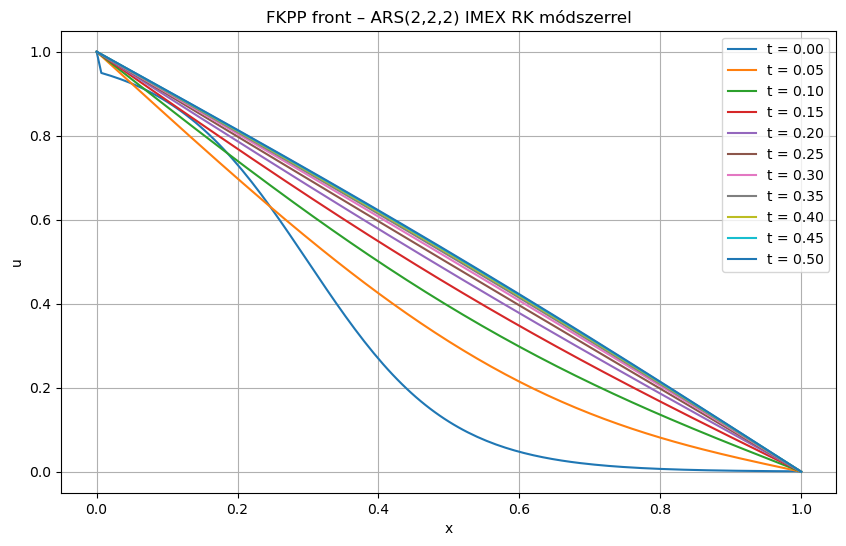

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- FKPP parameters ---
D = 1.0        # diffusion coefficient
r = 1.0      # reaction rate
a, b = 0.0, 1.0
N = 151
dx = (b - a) / (N - 1)
x = np.linspace(a, b, N)

# --- Initial condition: smooth front ---
beta = 10.0
x0 = 0.3
u_full = 1.0 / (1.0 + np.exp(beta * (x - x0)))
u_full[0] = 1.0   # Dirichlet left
u_full[-1] = 0.0  # Dirichlet right

# Interior unknowns
m = N - 2
u_int = u_full[1:-1].copy()

# Laplacian matrix for interior nodes
diag = -2.0 * np.ones(m)
off = 1.0 * np.ones(m - 1)
L = (1.0 / dx**2) * (np.diag(diag) + np.diag(off, 1) + np.diag(off, -1))

# Boundary contribution
bc_vec = np.zeros(m)
bc_vec[0]  = 1.0 / dx**2 * u_full[0]
bc_vec[-1] = 1.0 / dx**2 * u_full[-1]

def F(v):
    """Stiff term: diffusion."""
    return D * (L @ v + bc_vec)

def G(v):
    """Nonstiff term: reaction."""
    return r * v * (1.0 - v)

# --- ARS(2,2,2) coefficients ---
gamma = 1.0 - 1.0 / np.sqrt(2.0)  # ≈ 0.292893218
bE = np.array([0.5, 0.5])
bI = np.array([1.0 - gamma, gamma])

# Precompute inverse of (I - gamma*dt*D*L) each step
dt = 0.001
T_final = 0.5
nsteps = int(T_final / dt)

I = np.eye(m)
M = I - gamma * dt * D * L
M_inv = np.linalg.inv(M)

# Store profiles at selected times
save_times = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
save_indices = [int(t / dt) for t in save_times]
saved_profiles = []

# Save initial profile (t=0)
profile0 = np.zeros_like(x)
profile0[0], profile0[-1] = 1.0, 0.0
profile0[1:-1] = u_int
saved_profiles.append(profile0)

# Time-stepping loop
for n in range(1, nsteps + 1):
    # Stage 1
    rhs1 = u_int + gamma * dt * D * bc_vec
    Y1 = M_inv @ rhs1
    
    # Stage 2 (explicit & implicit contributions)
    F_Y1 = F(Y1)
    G_Y1 = G(Y1)
    
    rhs2 = u_int + dt * ((1.0 - gamma) * F_Y1 + G_Y1) + gamma * dt * D * bc_vec
    Y2 = M_inv @ rhs2
    
    F_Y2 = F(Y2)
    G_Y2 = G(Y2)
    
    # Update solution
    u_int = u_int + dt * ((1.0 - gamma) * F_Y1 + gamma * F_Y2 + 
                          0.5 * G_Y1 + 0.5 * G_Y2)
    
    # Save profile if needed
    if n in save_indices:
        profile = np.zeros_like(x)
        profile[0], profile[-1] = 1.0, 0.0
        profile[1:-1] = u_int
        saved_profiles.append(profile)

# Plot results
plt.figure(figsize=(10, 6))
for i, t in enumerate(save_times):
    plt.plot(x, saved_profiles[i], label=f't = {t:.2f}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('FKPP front – ARS(2,2,2) IMEX RK módszerrel')
plt.legend()
plt.grid(True)
plt.show()


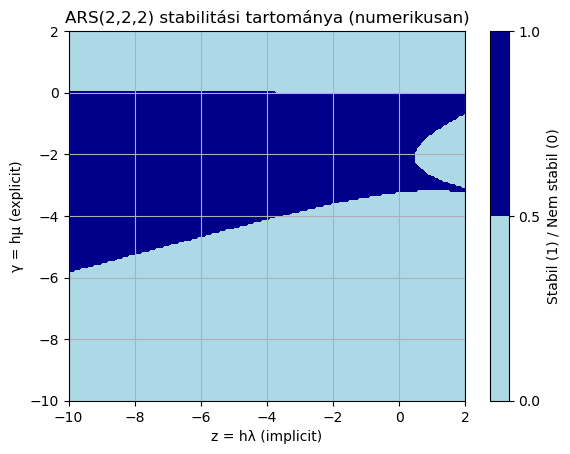

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def imex_ars222_stability(lambda_val, mu_val, dt, T=10):
    gamma = 1.0 - 1.0 / np.sqrt(2.0)
    t = 0
    u = 1.0  # kezdeti érték

    while t < T:
        # 1. stádium
        Y1 = (u + gamma * dt * mu_val * u) / (1 - gamma * dt * lambda_val)
        # 2. stádium
        Y2 = (u + dt * ((1 - gamma) * mu_val * Y1 + mu_val * Y1)) / (1 - gamma * dt * lambda_val)

        # frissítés
        u = u + dt * ((1 - gamma) * mu_val * Y1 + gamma * mu_val * Y2 + 0.5 * mu_val * Y1 + 0.5 * mu_val * Y2)
        t += dt

    return abs(u)

# Vizsgáljuk z = hλ és γ = hμ tartományban
z_vals = np.linspace(-10, 2, 200)
g_vals = np.linspace(-10, 2, 200)

Z, G = np.meshgrid(z_vals, g_vals)
stability = np.zeros_like(Z)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        lam = Z[i, j] / 1.0  # h = 1
        mu = G[i, j] / 1.0
        amp = imex_ars222_stability(lam, mu, dt=1.0, T=10)
        stability[i, j] = amp < 1.1  # stabil, ha amplifikációs tényező nem nő

plt.contourf(Z, G, stability, levels=1, colors=["lightblue", "darkblue"])
plt.xlabel("z = hλ (implicit)")
plt.ylabel("γ = hμ (explicit)")
plt.title("ARS(2,2,2) stabilitási tartománya (numerikusan)")
plt.colorbar(label="Stabil (1) / Nem stabil (0)")
plt.grid(True)
plt.show()
